In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [204]:
pokemon = pd.read_csv("pokemon.csv")

In [205]:
pokemon.shape

(304, 30001)

In [206]:
pokemon

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,target
0,37,106,111,37,106,111,37,106,111,37,...,37,106,111,37,106,111,37,106,111,Charmander
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Charmander
2,103,244,68,91,234,60,86,226,53,91,...,78,219,57,78,218,53,123,255,74,Pikachu
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Pikachu
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bulbasaur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,9,65,17,9,65,17,9,65,17,9,...,121,121,121,102,124,118,73,184,155,Bulbasaur
300,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Pikachu
301,0,6,6,1,7,7,1,7,9,1,...,118,124,124,142,144,145,118,119,120,Pikachu
302,255,250,247,255,250,247,255,250,247,255,...,252,233,226,253,220,217,255,186,191,Pikachu


In [207]:
x=pokemon.drop(columns='target',inplace=False).values
x.shape

(304, 30000)

In [208]:
x

array([[ 37, 106, 111, ...,  37, 106, 111],
       [255, 255, 255, ..., 255, 255, 255],
       [103, 244,  68, ..., 123, 255,  74],
       ...,
       [  0,   6,   6, ..., 118, 119, 120],
       [255, 250, 247, ..., 255, 186, 191],
       [255, 255, 255, ..., 252, 252, 252]], dtype=int64)

In [209]:
y = pokemon["target"].values
y.shape

(304,)

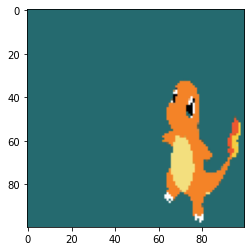

In [210]:
plt.imshow(x[0].reshape(100,100,3))

In [211]:
# Splitting Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.19, random_state = 0)

In [212]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(246, 30000) (246,)
(58, 30000) (58,)


In [213]:
### KNN ###

In [214]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 19)

In [215]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['Bulbasaur', 'Pikachu', 'Charmander', 'Charmander', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Bulbasaur', 'Charmander', 'Charmander', 'Charmander',
       'Pikachu', 'Bulbasaur', 'Charmander', 'Charmander', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Charmander', 'Charmander', 'Bulbasaur',
       'Bulbasaur', 'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu',
       'Bulbasaur', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu',
       'Charmander', 'Bulbasaur', 'Pikachu', 'Charmander', 'Bulbasaur',
       'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Pikachu',
       'Bulbasaur', 'Charmander', 'Charmander', 'Charmander', 'Bulbasaur',
       'Charmander', 'Bulbasaur', 'Pikachu'], dtype=object)

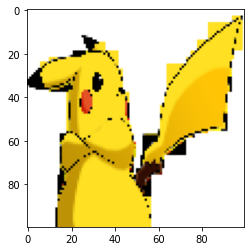

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


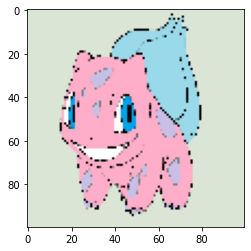

Actual Label:  Bulbasaur
Predicted Label:  ['Charmander']


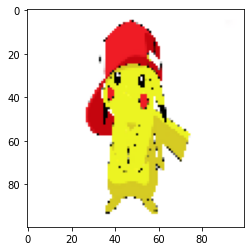

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


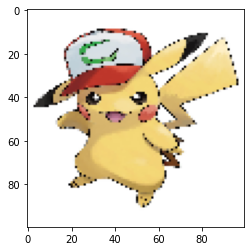

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


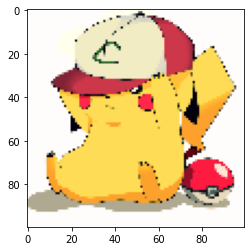

Actual Label:  Pikachu
Predicted Label:  ['Charmander']


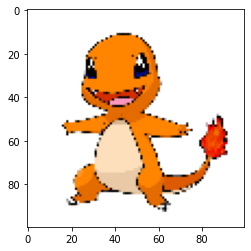

Actual Label:  Charmander
Predicted Label:  ['Charmander']


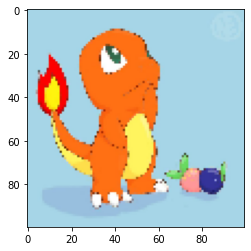

Actual Label:  Charmander
Predicted Label:  ['Charmander']


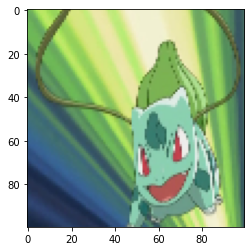

Actual Label:  Bulbasaur
Predicted Label:  ['Bulbasaur']


In [216]:
for i in [1, 4, 7, 9, 12, 13, 18, 30]:
    random_img = x_test[i]
    plt.imshow(random_img.reshape(100,100,3))
    plt.show()
    print("Actual Label: ", y_test[i])
    m = model.predict([random_img])
    print("Predicted Label: ", m)

In [217]:
# ACCURACY
a=model.score(x_test, y_test)
print(a)

0.8448275862068966


In [218]:
### LOGISTIC REGRESSION ###

In [219]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [220]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

C:\Users\lipik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Bulbasaur', 'Pikachu', 'Charmander', 'Charmander', 'Bulbasaur',
       'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu',
       'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Bulbasaur',
       'Bulbasaur', 'Charmander', 'Charmander', 'Bulbasaur', 'Bulbasaur',
       'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Bulbasaur',
       'Charmander', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu',
       'Bulbasaur', 'Pikachu', 'Charmander', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Charmander', 'Charmander', 'Charmander', 'Bulbasaur',
       'Charmander', 'Bulbasaur', 'Pikachu'], dtype=object)

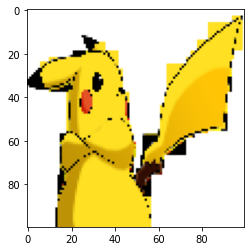

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


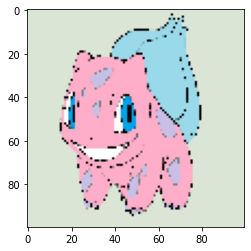

Actual Label:  Bulbasaur
Predicted Label:  ['Bulbasaur']


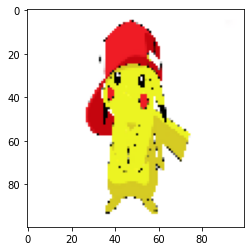

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


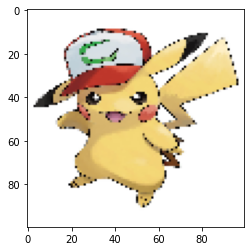

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


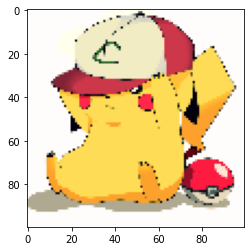

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


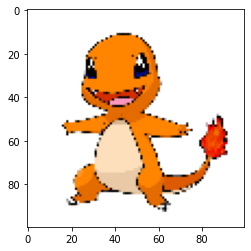

Actual Label:  Charmander
Predicted Label:  ['Charmander']


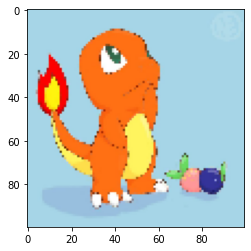

Actual Label:  Charmander
Predicted Label:  ['Charmander']


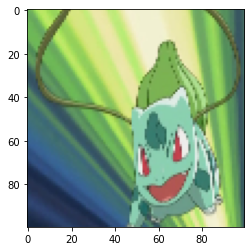

Actual Label:  Bulbasaur
Predicted Label:  ['Bulbasaur']


In [221]:
for i in [1, 4, 7, 9, 12, 13, 18, 30]:
    random_img = x_test[i]
    plt.imshow(random_img.reshape(100,100,3))
    plt.show()
    print("Actual Label: ", y_test[i])
    m = model.predict([random_img])
    print("Predicted Label: ", m)

In [222]:
# ACCURACY
b=model.score(x_test, y_test)
print(b)

0.9827586206896551


In [223]:
### AS WE CAN SEE, THE ACCURACY OF PREDICTION IS MORE IN LOGISTIC REGRESSION THAN KNN.
### LOGISTIC REGRESSION: 0.9836065573770492
### KNN: 0.8448275862068966
### THEREFORE, FOR THE GIVEN DATA "LOGISTIC REGRESSION" IS THE BETTER METHOD THAN KNN.

In [224]:
print("KNN:",a)
print("LOGISTIC REGRESSION",b)
if a>b:
    print()
    print("KNN is the better method than Logistic Regression, for the given dataset.")
else:
    print()
    print("Logistic Regression is the better method than KNN, for the given dataset.")

KNN: 0.8448275862068966
LOGISTIC REGRESSION 0.9827586206896551

Logistic Regression is the better method than KNN, for the given dataset.
